# Hands-on Lattice Calculations in Python

*D. Gamba, A. Gilardi, T. Prebibaj*

[CAS 2025 - Introduction to Accelerator Physics](https://indico.cern.ch/event/1483926/) (21 September - 4 October 2025, Santa Susanna, Spain).

<p align="center">
<img src=./_img_exercises/banner.png width="80%">
</p>

## Introduction 

- The *Hands-on Lattice Calculations in Python* course is designed to guide you through **a series of conceptual exercises** to help you understand **the basics of transverse beam dynamics**.
As the name suggests, you will solve these exercises using *Python*. 

- For each problem, we will propose *a possible way* to implement the solution in Python. In most cases, there are multiple paths to achieve the same result, and we encourage you to explore them.

- **The main objective is to spark your curiosity!** Each exercise is intentionally kept simple, but it should serve as a starting point to trigger more questions and explore the underlying physics more deeply with the tools that we provide you. 

## Is your computer ready?

You received the [instructions](https://github.com/cerncas/hands-on-python/blob/main/Setup_Instructions.md) on how to prepare your python working environment.

**❓QUESTION: is everyone able to launch a jupyter lab server from their laptop?** 

**❓QUESTION: can you import the following packages without errors?** 


In [1]:
# numpy: our main numerical package
import numpy as np

# matplotlib and seaborn: our plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# linear algebra and optimisation algorithms
from numpy.linalg import norm
from scipy.optimize import minimize

# some useful package
from copy import deepcopy

# **Optional:** for animations you might need to configure your jupyter lab properly:
# > pip install ipywidgets
# > jupyter nbextension enable --py widgetsnbextension
from ipywidgets import interactive

### ... some other setup not to be bothered later

Let's also configure `matplotlib` for more presentation-friendly plot production

In [2]:
# some setup for the plotting
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (15, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

In [3]:
# ignore "FutureWarning"... (temporary patch for seaborn package issues...)
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# The Python Basics

---

lists, dictionaries, and numpy arrays...

In [4]:
# a list of object is defined with [], and element accessed with [idx]
example_list = [1, 2, 3, 4]
print(f"The third element in the list is: {example_list[2]}")

# a list can contain any object, also another list to
# "fake" multi-dimensional arrays
list_of_lists = [[1, 2, 3, 4], [5, 6, 7, 8]]
print(f"A list of lists looks almost like a matrix:\n" f"{list_of_lists}")

# a dictionary is defined with {}, and elements are accessed with ['key_value']
dictionary = {"a_key": 34, "another_key": "value as string", 3: "value associated to an int key"}
print(f"The value associated to key 'a_key' in 'dictionary' is: \n" f"    {dictionary['a_key']}")

The third element in the list is: 3
A list of lists looks almost like a matrix:
[[1, 2, 3, 4], [5, 6, 7, 8]]
The value associated to key 'a_key' in 'dictionary' is: 
    34


In [5]:
# a numpy array can be created from a list of numbers
two_dimensional_array = np.array(list_of_lists)
print(f"np.array is a nicer representation of matrices:\n" f"{two_dimensional_array}")
print(f"First row, second column value is: {two_dimensional_array[0,1]}")

# or from a random generator
random_2D_array = np.random.randn(2, 100)

# and one can do mathematical operations
print(
    f"means (over column idx, i.e. dim=1): \n"
    f"   {np.mean(random_2D_array,1)}\n"
    f"and std: \n"
    f"   {np.std(random_2D_array,1)}"
)

np.array is a nicer representation of matrices:
[[1 2 3 4]
 [5 6 7 8]]
First row, second column value is: 2
means (over column idx, i.e. dim=1): 
   [-0.14416813  0.09240256]
and std: 
   [0.91679389 0.90000642]


## Plotting and number generation

- plots typically done with matplotlib (`import matplotlib.pyplot as plt`)
- numpy includes functions to easily generate equally spaced numbers (`np.linspace(...)`) or Gaussian-distributed (`np.random.randn(...)`)

Text(0, 0.5, 'y_data for 2 curves')

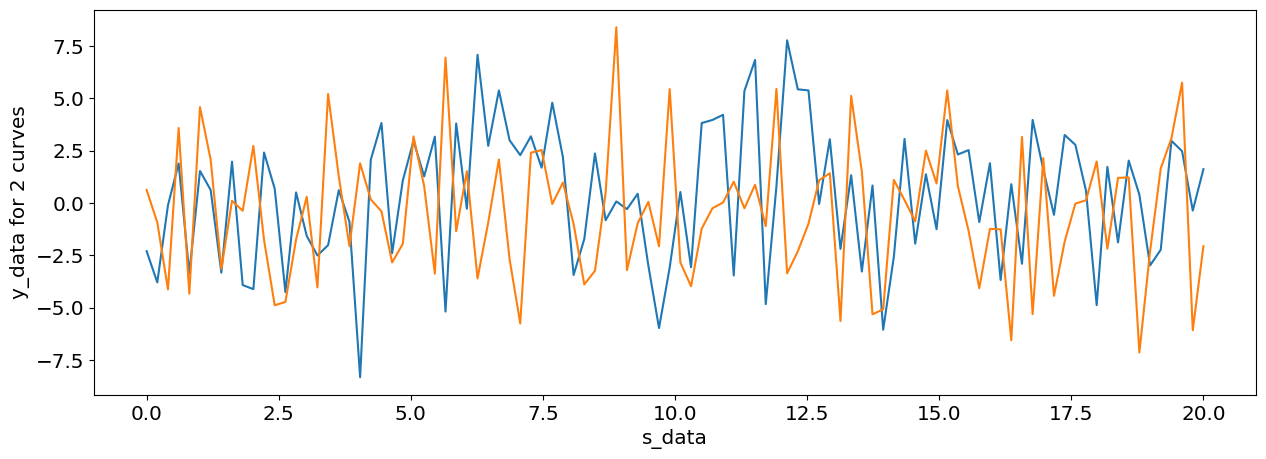

In [6]:
#  generate 100 points equally spaced between 0 and 20
s_data = np.array(np.linspace(0, 20, 100))
#  generate 100x2 random points (Gaussian distributed with std=3)
y_data = 3 * np.random.randn(100, 2)
plt.plot(s_data, y_data)
plt.xlabel("s_data")
plt.ylabel("y_data for 2 curves")

### Something more fancy:
One can profit of seaborn (`import seaborn as sns`) for more complex/nicer plots.

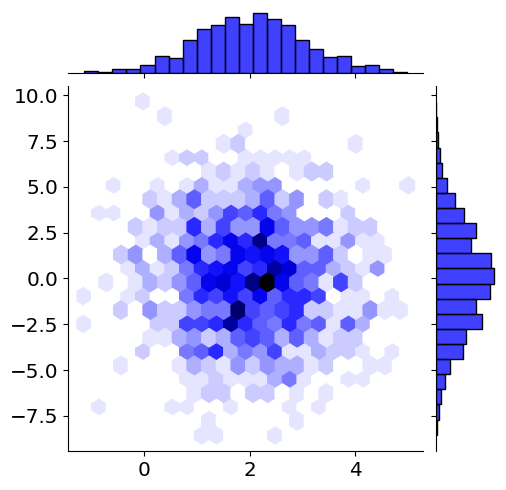

In [7]:
x_data = np.random.randn(1000) + 2
y_data = 3 * np.random.randn(1000)
sns.jointplot(x=x_data, y=y_data, kind="hex", color="b", height=5)

### Something even more fancy: animations (optional)

one can profit of the "interactive" package (`from ipywidgets import interactive`)
for creating user-friendly interactive plots, e.g. while varying a parameter

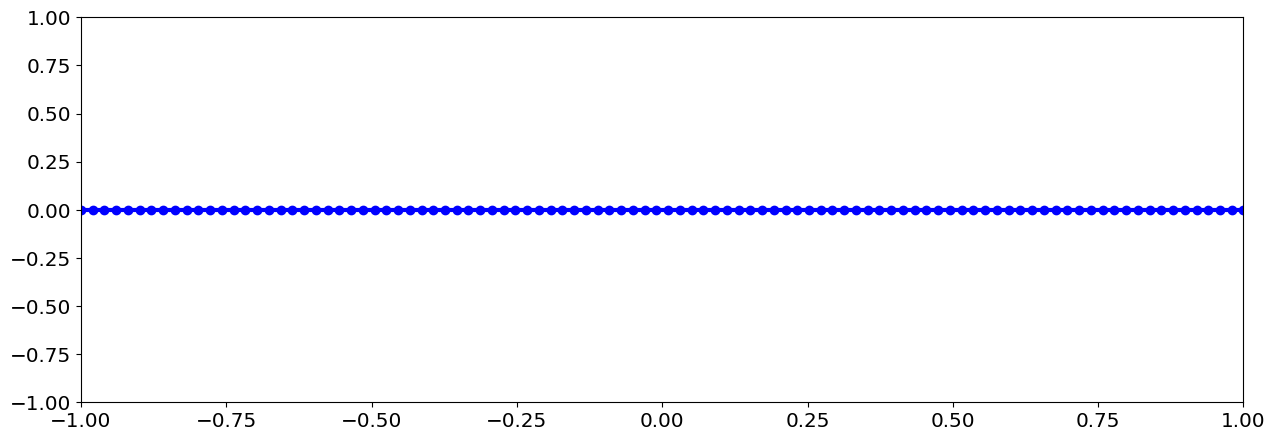

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

In [9]:
# define x array
data_x = np.linspace(-1, 1, 100)


# define the function to be executed at each change of some input parameter
def plotIt(a, b, c):
    data_y = a * (data_x) ** 3 + b * (data_x) ** 2 + c * (data_x)
    plt.plot(data_x, data_y, "o-b", lw=3)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])


# create interactive plot, and display it
interactive_plot = interactive(plotIt, a=(-1, 1, 0.1), b=(-2, 2, 0.1), c=(-3, 3, 0.1), continuous_update=True)
# sometimes needed:
# interactive_plot.children[-1].layout.height = '350px'
display(interactive_plot)

# Course Structure
---

This course is built around a few **main guided notebooks**, each focusing on a key concept:

- [01_Single_Particle](./01_Single_Particle.ipynb): Introducing basic concepts by tracking one or few particles
- [02_Multi_Particles](./02_Multi_Particles.ipynb): Tracking many particles
- [03_Periodic_Systems](./03_Periodic_Systems.ipynb): Exploring periodic lattices
- [04_Dispersion](./04_Dispersion.ipynb): Understanding dispersion
- [05_4D_Systems](./05_4D_Systems.ipynb): Tracking in both H & V planes

You’ll find the solutions to each notebook in the [solutions](./solutions/) directory: try not to look at it immediatelly... 

## Custom tracking library

To keep the coding simple, we have created some useful functions in the [tracking_library.py](./tracking_library.py) file.

- You can import all of them using `from tracking_library import * `


- To see what a function does, you can use `help(function)` in a new cell.


Functions that can be imported from the [tracking_library.py](./tracking_library.py) file:

| Description                                                       | Syntax                    | Returns                                                             |
|-------------------------------------------------------------------|------------------------------------|----------------------------------------------------------------------|
| **Drift space element** of length `L` (2x2 matrix).                     | `D(L)`                             | `list of dict` with 'matrix' and 'length'                     |
| **Thin-lens quadrupole element** with focal length `f` (2x2 matrix).   | `Q(f)`                             | `list of dict` with 'matrix' and **'length' = 0**                 |
| Thick sector bend with deflecting angle `phi` and length `L` (2x2 matrix).        | `B(phi, L)`                        | `list of dict` with 'matrix' and 'length'                     |
| Compute the **equivalent transfer matrix** and total length of a beamline (list of elements).         | `getEquivalentElement(beamline)`  | `list of dict` with equivalent 'matrix' and total 'length'         |
| **Track particle(s)** through a beamline.                            | `transportParticles(X_0, beamline)`| `dict` with 'x', 'xp', 's', and 'coords' arrays                     |
| **Transport a sigma matrix** through a beamline.                     | `transportSigmas(sigma_0, beamline)`| `dict` with sigma elements, 's', and full sigma matrices           |
| **Compute Twiss parameters** and tune for a periodic beamline.       | `twiss(beamline)`                 | `tune`, `beta`, `alpha`, `gamma`                                    |
| Drift space element of length `L` (3x3 matrix to account for energy).   | `D3(L)`                            | `list of dict` with 'matrix' and 'length'                     |
| Thin-lens quadrupole element with focal length `f` (3x3 matrix to account for energy).     | `Q3(f)`                            | `list of dict` with 'matrix' and 'length' = 0                 |
| Thick sector bend with deflecting angle `phi` and length `L` (3x3 matrix to account for energy). | `B3(phi, l)`                       | `list of dict` with 'matrix' and 'length'                     |


## Additional/Optional exercises

For each notebook, there are **optional notebooks** with extra exercises to gain additional insights (for who has the time & curiosity):

- [Optional_01_Single_Particle_Physics](./Optional_01_Single_Particle_Physics.ipynb)
- [Optional_01_Single_Particle_Python](./Optional_01_Single_Particle_Python.ipynb)
- [Optional_02_Multi_Particles_Physics](./Optional_02_Multi_Particles_Physics.ipynb)
- [Optional_02_Multi_Particles_Python](./Optional_02_Multi_Particles_Python.ipynb)
- [Optional_03_Periodic_Systems_Physics](./Optional_03_Periodic_Systems_Physics.ipynb)

The `Physics` suffix indicates exercises for better understanding the physics being treated in the corresponding main notebook. The `Python` suffix indicates exercises for better understanding the Python implementation of the simple libraries we provided.

> **NOTE**: For some of those exercises, you might need to extend the tracking library. You can find the canvas where to extend the library in [tracking_library_advanced.py](./tracking_library_advanced.py), and/or you can simply look at the fully developed solution [tracking_library_advanced_solution.py](./solutions/tracking_library_advanced_solution.py)

## How the course works

- We will go through **some exercises together** ("guided").
- Then, for each new exercise, I will **introduce the problem and you will have 5–15 minutes to try it yourself**.
    - Myself, Davide and TBA will be available to help you!
- After that, we will **solve it together and move on to the next one**.

Along the way, we will take short breaks from coding to **revisit important physics concepts** (“⚛️ Physics Focus”) or to **refresh our Python skills** (“🐍 Python Corner”).

# Let's start!
---

=> **Start this adventure with the first [notebook](./01_Single_Particle.ipynb)**...
